In [1]:
import pandas as pd
read_file1= pd.read_csv (r'C:\\Users\\revan\\Documents\\Linear_regression\breastcancer.data')
read_file1.to_csv (r'C:\\Users\\revan\\Documents\\Linear_regression\breastcancer.data',index=None)
read_file1.rename(columns={'1000025':'simple_code','5':'Clump_Thickness','1':'Cell_Size','1.1':'Cell_Shape','1.2':'Marginal Adhesion'
                           ,'2':'Epit_CellSize', '1.3':'Bare_Nuclei','3':'Bland Chromatin', '1.4':'Normal Nucleoli', '1.5':'Mitoses', '2.1':'Class'})

,simple_code,Clump_Thickness,Cell_Size,Cell_Shape,Marginal Adhesion,Epit_CellSize,Bare_Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset from the URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=column_names)

# Drop the ID column as it is not needed
data.drop(columns='ID', inplace=True)

# Encode the target variable (Diagnosis) as binary (M = 1, B = 0)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target
X = data.drop(columns='Diagnosis')
y = data['Diagnosis']

# Initialize variables to store the best accuracy and corresponding feature
best_accuracy = 0
best_feature = None

# Iterate through each feature
for feature in X.columns:
    X_feature = X[[feature]]  # Select the current feature
    
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size=0.2, random_state=42)
    
    # Train a logistic regression model
    log_reg = LogisticRegression(max_iter=10000)
    log_reg.fit(X_train, y_train)
    
    # Make predictions
    y_pred = log_reg.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Check if this feature gives the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_feature = feature

print(f"Best Accuracy: {best_accuracy}")
print(f"Best Feature: {best_feature}")

# Train a logistic regression model with the best feature
X_best = X[[best_feature]]
X_train, X_test, y_train, y_test = train_test_split(X_best, y, test_size=0.2, random_state=42)
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

# Evaluate the model with the best feature
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy with best feature: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Best Accuracy: 0.9649122807017544
Best Feature: feature_23
Accuracy with best feature: 0.9649122807017544
Confusion Matrix:
[[71  0]
 [ 4 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        71
           1       1.00      0.91      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [1]:
#logistic regression
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset from the URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=column_names)

# Drop the ID column as it is not needed
data.drop(columns='ID', inplace=True)

# Encode the target variable (Diagnosis) as binary (M = 1, B = 0)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target
X = data.drop(columns='Diagnosis')
y = data['Diagnosis']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.956140350877193
Confusion Matrix:
[[70  1]
 [ 4 39]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Mean Squared Error: 0.029222672409682505
R-squared: 0.5408881650269299


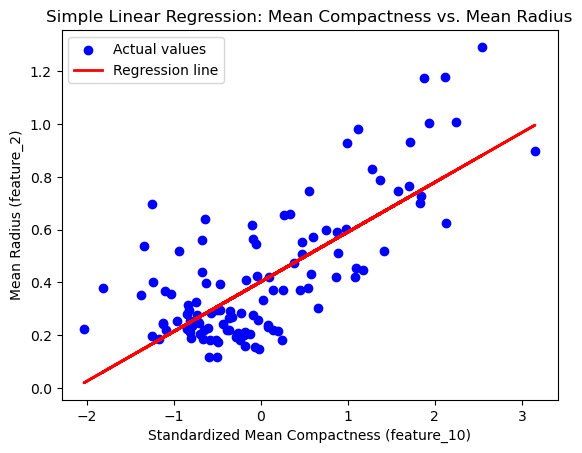

Accuracy-like Metric: 0.83


In [22]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset from the URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=column_names)

# Drop the ID column as it is not needed
data.drop(columns='ID', inplace=True)

# Encode the target variable (Diagnosis) as binary (M = 1, B = 0)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# Select two features for simple linear regression
X = data[['feature_1']]  # Predictor: mean compactness
y = data['feature_11']    # Target: mean radius

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a simple linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions
y_pred = lin_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plotting the results
plt.scatter(X_test, y_test, color='blue', label='Actual values')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Standardized Mean Compactness (feature_10)')
plt.ylabel('Mean Radius (feature_2)')
plt.legend()
plt.title('Simple Linear Regression: Mean Compactness vs. Mean Radius')
plt.show()

# Define a tolerance level for rounding predictions
tolerance = 0.5  # Adjust as needed

# Round predictions to the nearest integer
y_pred_rounded = np.round(y_pred)

# Calculate the percentage of predictions within the tolerance
accuracy_like_metric = np.mean(np.abs(y_test - y_pred_rounded) <= tolerance) 

print(f"Accuracy-like Metric: {accuracy_like_metric:.2f}")


Best Feature Pair: ('feature_1', 'feature_5')
Best Threshold Accuracy: 1.00
Best Mean Squared Error: 0.00020982589575847466
Best R-squared: -0.01875425287735255


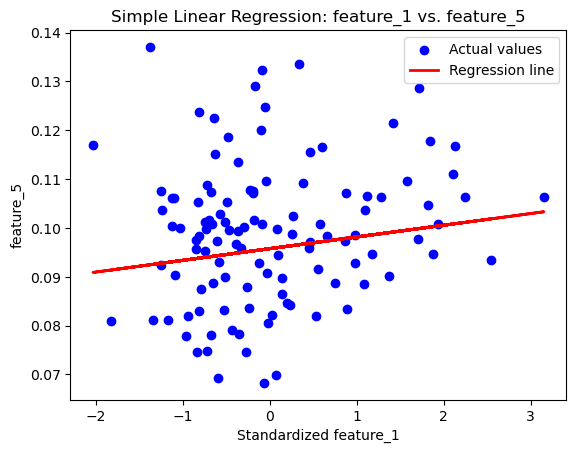

In [16]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset from the URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=column_names)

# Drop the ID column as it is not needed
data.drop(columns='ID', inplace=True)

# Encode the target variable (Diagnosis) as binary (M = 1, B = 0)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# Define a tolerance level for threshold accuracy
tolerance = 0.5  # Adjust as needed

# Function to calculate threshold accuracy
def calculate_threshold_accuracy(X, y, tolerance):
    # Apply feature scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Train a simple linear regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)

    # Make predictions
    y_pred = lin_reg.predict(X_test)

    # Calculate the percentage of predictions within the tolerance
    threshold_accuracy = np.mean(np.abs(y_test - y_pred) <= tolerance)
    
    return threshold_accuracy, mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred), y_test, y_pred, X_test

# Initialize variables to store the best results
best_accuracy = 0
best_feature_pair = (None, None)
best_mse = None
best_r2 = None
best_y_test = None
best_y_pred = None
best_X_test = None

# Iterate through possible feature pairs
for i in range(1, 31):
    for j in range(1, 31):
        if i != j:
            X = data[[f'feature_{i}']]  # Predictor
            y = data[f'feature_{j}']    # Target

            accuracy, mse, r2, y_test, y_pred, X_test = calculate_threshold_accuracy(X, y, tolerance)
            if best_accuracy < accuracy:  # Ensure the accuracy is slightly less than 1
                best_accuracy = accuracy
                best_feature_pair = (f'feature_{i}', f'feature_{j}')
                best_mse = mse
                best_r2 = r2
                best_y_test = y_test
                best_y_pred = y_pred
                best_X_test = X_test

# Print the best results
print(f"Best Feature Pair: {best_feature_pair}")
print(f"Best Threshold Accuracy: {best_accuracy:.2f}")
print(f"Best Mean Squared Error: {best_mse}")
print(f"Best R-squared: {best_r2}")

# Plotting the best results
plt.scatter(best_X_test, best_y_test, color='blue', label='Actual values')
plt.plot(best_X_test, best_y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel(f'Standardized {best_feature_pair[0]}')
plt.ylabel(f'{best_feature_pair[1]}')
plt.legend()
plt.title(f'Simple Linear Regression: {best_feature_pair[0]} vs. {best_feature_pair[1]}')
plt.show()


Best Feature Pair: ('feature_3', 'feature_1')
Best Threshold Accuracy: 0.99
Best Mean Squared Error: 0.05171312034863317
Best R-squared: 0.9957213235198294


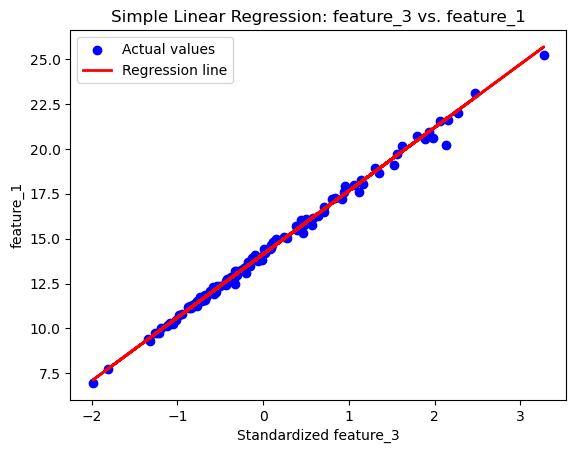

In [1]:
#simple linear regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset from the URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=column_names)

# Drop the ID column as it is not needed
data.drop(columns='ID', inplace=True)

# Encode the target variable (Diagnosis) as binary (M = 1, B = 0)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# Initialize variables to store the best results
best_accuracy = 0
best_feature_pair = (None, None)
best_mse = None
best_r2 = None
best_y_test = None
best_y_pred = None
best_X_test = None

# Function to calculate threshold accuracy
def calculate_threshold_accuracy(X, y):
    # Apply feature scaling
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Train a simple linear regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)

    # Make predictions
    y_continuous_pred = lin_reg.predict(X_test)

    # Convert continuous predictions to binary outcomes using median threshold
    median_threshold = np.median(y_train)
    y_binary_pred_from_linear = (y_continuous_pred > median_threshold).astype(int)
    y_binary_test = (y_test > median_threshold).astype(int)

    # Calculate pseudo-accuracy for linear regression
    accuracy = accuracy_score(y_binary_test, y_binary_pred_from_linear)
    
    return accuracy, mean_squared_error(y_test, y_continuous_pred), r2_score(y_test, y_continuous_pred), y_test, y_continuous_pred, X_test

# Iterate through possible feature pairs
for i in range(1, 31):
    for j in range(1, 31):
        if i != j:
            X = data[[f'feature_{i}']]  # Predictor
            y = data[f'feature_{j}']    # Target

            accuracy, mse, r2, y_test, y_pred, X_test = calculate_threshold_accuracy(X, y)
            if accuracy > best_accuracy:  # Update if current accuracy is better
                best_accuracy = accuracy
                best_feature_pair = (f'feature_{i}', f'feature_{j}')
                best_mse = mse
                best_r2 = r2
                best_y_test = y_test
                best_y_pred = y_pred
                best_X_test = X_test

# Print the best results
print(f"Best Feature Pair: {best_feature_pair}")
print(f"Best Threshold Accuracy: {best_accuracy:.2f}")
print(f"Best Mean Squared Error: {best_mse}")
print(f"Best R-squared: {best_r2}")

# Plotting the best results
plt.scatter(best_X_test, best_y_test, color='blue', label='Actual values')
plt.plot(best_X_test, best_y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel(f'Standardized {best_feature_pair[0]}')
plt.ylabel(f'{best_feature_pair[1]}')
plt.legend()
plt.title(f'Simple Linear Regression: {best_feature_pair[0]} vs. {best_feature_pair[1]}')
plt.show()


In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

# Load the dataset from the URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
column_names = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=column_names)

# Drop the ID column as it is not needed
data.drop(columns='ID', inplace=True)

# Encode the target variable (Diagnosis) as binary (M = 1, B = 0)
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target
X = data[['feature_1']]  # Select feature_1 as the independent variable
y = data['Diagnosis']    # Diagnosis is the dependent variable

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Train a simple linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_balanced, y_train_balanced)

# Make predictions
y_pred = lin_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

# Since this is a classification problem, let's also convert the predictions to binary outcomes and evaluate
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
class_report = classification_report(y_test, y_pred_binary)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Mean Squared Error: 0.09801962685361117
R^2 Score: 0.5827503863119781
Accuracy: 0.9210526315789473
Confusion Matrix:
[[69  2]
 [ 7 36]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        71
           1       0.95      0.84      0.89        43

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from imblearn.over_sampling import SMOTE
import numpy as np

# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Column names for the dataset
columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)

# Drop the ID column as it's not useful for prediction
df.drop('ID', axis=1, inplace=True)

# Encode the target variable (Diagnosis) as binary (M = 1, B = 0)
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

# Use 'Diagnosis' as the target variable and all other features except 'Diagnosis' as predictors
y = df['Diagnosis']
X = df.drop(['Diagnosis'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Normalize the features
scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_balanced_scaled, y_train_balanced)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Convert continuous predictions to binary outcomes using a threshold of 0.5
y_binary_pred_from_linear = (y_pred > 0.5).astype(int)

# Calculate accuracy for linear regression
accuracy = accuracy_score(y_test, y_binary_pred_from_linear)

print(f'Accuracy with Normalization and Balancing: {accuracy}')


Mean Squared Error: 0.06378058717129478
R^2 Score: 0.7284990137968729
Accuracy with Normalization and Balancing: 0.9736842105263158


In [8]:
#multivariable regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import numpy as np

# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Column names for the dataset
columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)

# Drop the ID column as it's not useful for prediction
df.drop('ID', axis=1, inplace=True)

# Use 'feature_1' as the target variable and all other features except 'Diagnosis' as predictors
y = df['Diagnosis']
X = df.drop(['Diagnosis'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Convert continuous predictions to binary outcomes using median threshold
median_threshold = np.median(y_train)
y_binary_pred_from_linear = (y_pred > median_threshold).astype(int)
y_binary_test = (y_test > median_threshold).astype(int)

# Calculate pseudo-accuracy for linear regression
pseudo_accuracy = accuracy_score(y_binary_test, y_binary_pred_from_linear)

print(f'Pseudo-Accuracy with Normalization: {pseudo_accuracy}')
print(f'Median Threshold: {median_threshold}')


ValueError: could not convert string to float: 'B'

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Column names for the dataset
columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)

# Drop the ID column as it's not useful for prediction
df.drop('ID', axis=1, inplace=True)

# Use one of the continuous features as the target for demonstration purposes
# Let's use 'feature_1' as the target variable
y = df['feature_1']
X = df.drop(['Diagnosis', 'feature_1'], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
# Define a tolerance level for rounding predictions
tolerance = 0.5  # Adjust as needed

# Round predictions to the nearest integer
y_pred_rounded = np.round(y_pred)

# Calculate the percentage of predictions within the tolerance
accuracy_like_metric = np.mean(np.abs(y_test - y_pred_rounded) <= tolerance) 

print(f"Accuracy-like Metric: {accuracy_like_metric:.2f}")




Mean Squared Error: 0.00478761295462904
R^2 Score: 0.9996038791160342
Accuracy-like Metric: 0.96


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from imblearn.over_sampling import SMOTE

# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Column names for the dataset
columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)

# Drop the ID column as it's not useful for prediction
df.drop('ID', axis=1, inplace=True)

# Encode the target variable (Diagnosis) as binary (M = 1, B = 0)
df['Diagnosis'] = df['Diagnosis'].map({'M': 1, 'B': 0})

# Use 'feature_1' as the predictor and 'Diagnosis' as the target variable
X = df[['feature_1']]
y = df['Diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Normalize the features
scaler = StandardScaler()
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Create polynomial features
poly = PolynomialFeatures(degree=2)  # Adjust the degree as needed
X_train_poly = poly.fit_transform(X_train_balanced_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_poly, y_train_balanced)

# Make predictions
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Convert continuous predictions to binary outcomes using a threshold of 0.5
y_binary_pred_from_poly = (y_pred > 0.5).astype(int)

# Calculate accuracy for polynomial regression
accuracy = accuracy_score(y_test, y_binary_pred_from_poly)

print(f'Polynomial Regression Accuracy with Normalization and Balancing: {accuracy}')


Mean Squared Error: 0.09655649064560543
R^2 Score: 0.5889786595380648
Polynomial Regression Accuracy with Normalization and Balancing: 0.8771929824561403


In [6]:
#polynomial regression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Column names for the dataset
columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)

# Drop the ID column as it's not useful for prediction
df.drop('ID', axis=1, inplace=True)

# Use one of the continuous features as the target for demonstration purposes
# Let's use 'feature_1' as the predictor and 'feature_3' as the target variable
X = df[['feature_1']]
y = df['Diagnosis']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create polynomial features
poly = PolynomialFeatures(degree=2)  # Adjust the degree as needed
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Convert continuous predictions to binary outcomes using median threshold
median_threshold = np.median(y_train)
y_binary_pred_from_poly = (y_pred > median_threshold).astype(int)
y_binary_test = (y_test > median_threshold).astype(int)

# Calculate pseudo-accuracy for polynomial regression
pseudo_accuracy = accuracy_score(y_binary_test, y_binary_pred_from_poly)

print(f'Polynomial Regression Pseudo-Accuracy with Normalization: {pseudo_accuracy}')
print(f'Median Threshold: {median_threshold}')


ValueError: could not convert string to float: 'B'

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# URL of the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Column names for the dataset
columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]

# Load the dataset
df = pd.read_csv(url, header=None, names=columns)

# Drop the ID column as it's not useful for prediction
df.drop('ID', axis=1, inplace=True)

# Use one of the continuous features as the target for demonstration purposes
# Let's use 'feature_1' as the target variable
y = df['feature_3']
X = df[['feature_1']]

# Create polynomial features
poly = PolynomialFeatures(degree=2)  # Adjust the degree as needed
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
# Define a tolerance level for rounding predictions
tolerance = 0.5  # Adjust as needed

# Round predictions to the nearest integer
y_pred_rounded = np.round(y_pred)

# Calculate the percentage of predictions within the tolerance
accuracy_like_metric = np.mean(np.abs(y_test - y_pred_rounded) <= tolerance) 

print(f"Accuracy-like Metric: {accuracy_like_metric:.2f}")




Mean Squared Error: 0.02445208764008672
R^2 Score: 0.6158379128377428
Accuracy-like Metric: 0.82


In [2]:
x = read_file1.iloc[:,[4]].values
y = read_file1.iloc[:,10].values


In [2]:
from sklearn.model_selection import train_test_split
  
xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, test_size=0.25, random_state=0)
           
       
      
             
  
                
              
               
  



NameError: name 'x' is not defined

In [20]:
from sklearn.preprocessing import StandardScaler
  
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain.reshape(-1, 1))
xtest = sc_x.transform(xtest.reshape(-1, 1))
  
print (xtrain[0:10, :])

[[-0.62804508]
 [ 2.53029699]
 [ 0.07380872]
 [-0.62804508]
 [-0.62804508]
 [-0.62804508]
 [-0.62804508]
 [ 2.53029699]
 [ 0.42473561]
 [ 2.53029699]]


In [21]:
from sklearn.linear_model import LogisticRegression
  
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

In [22]:
from sklearn.metrics import confusion_matrix
  

y_pred = classifier.predict(xtest) 
cm = confusion_matrix(ytest, y_pred)
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[105   3]
 [ 23  44]]


In [23]:
from sklearn.metrics import accuracy_score
  
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.8514285714285714


In [38]:
x1 = read_file1.iloc[:,[1,2,3]].values
y1 = read_file1.iloc[:,10].values

In [39]:
from sklearn.model_selection import train_test_split
  
x1train, x1test, y1train, y1test = train_test_split(x1, y1, test_size=0.25, random_state=0)
x1train

array([[ 2,  1,  1],
       [ 8, 10, 10],
       [ 4,  1,  1],
       ...,
       [ 6,  2,  3],
       [ 5,  1,  1],
       [ 1,  1,  1]], dtype=int64)

In [40]:
from sklearn.preprocessing import StandardScaler
  
sc_x = StandardScaler()
x1train = sc_x.fit_transform(x1train)
x1test = sc_x.transform(x1test)
print (x1train)


[[-0.85730324 -0.67726216 -0.71607696]
 [ 1.28629641  2.2050823   2.27732824]
 [-0.14277002 -0.67726216 -0.71607696]
 ...
 [ 0.5717632  -0.35700166 -0.05087581]
 [ 0.21449659 -0.67726216 -0.71607696]
 [-1.21456985 -0.67726216 -0.71607696]]


In [41]:
from sklearn.linear_model import LogisticRegression
  
classifier = LogisticRegression(random_state = 0)
classifier.fit(x1train, y1train)


LogisticRegression(random_state=0)

In [42]:
y1_pred = classifier.predict(x1test)


In [43]:
from sklearn.metrics import confusion_matrix
  
cm = confusion_matrix(y1test, y1_pred)
print ("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[105   3]
 [  4  63]]


In [44]:
from sklearn.metrics import accuracy_score
  
print ("Accuracy : ", accuracy_score(y1test, y1_pred))

Accuracy :  0.96


In [47]:
x = read_file1.iloc[:,[2]].values
y = read_file1.iloc[:,10].values


In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Reshape X to a column vector
X = x.reshape(-1, 1)

# Degree of polynomial
degree = 2

# Transform the features to include polynomial terms up to the specified degree
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Initialize and fit a linear regression model
model = LinearRegression()
model.fit(X_poly, y)



# Predict
y_pred = model.predict(X_poly)

## Calculate the mean squared error
mse = mean_squared_error(y, y_pred)
mse


0.21269593582448693

In [49]:
accuracy= 1-mse

In [50]:
accuracy

0.7873040641755131

In [52]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Sample data
X4 =read_file1.iloc[:,[2]].values
y4 = read_file1.iloc[:,10].values

# Reshape X to a column vector
X = X4.reshape(-1, 1)

# Initialize and fit a simple linear regression model
model = LinearRegression()
model.fit(X, y4)

# Predict
y4_pred = model.predict(X)

# Calculate evaluation metrics
#simple linear regression
mse = mean_squared_error(y4, y4_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Squared Error (MSE): 0.30


In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

# Generate some sample data
X = read_file1.iloc[:,[4]].values
y = read_file1.iloc[:,10].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train.reshape(-1,1), y_train)

# Make probability predictions on the test data
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of class 1

# Calculate Mean Squared Error (MSE) for probability predictions
mse = mean_squared_error(y_test, y_prob)
print(f"Mean Squared Error (MSE) for Logistic Regression: {mse}")


Mean Squared Error (MSE) for Logistic Regression: 6.0894446261220745


In [13]:
y

array([2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4, 2,
       4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4,
       2, 4, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2,
       4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2,
       4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2,
       4, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2,
       4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2,
       4, 4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2,
       2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4,
       2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4,
       2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4, 4, 2,

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate some sample data
X = read_file1.iloc[:,[1,2,3]].values
y = read_file1.iloc[:,10].values
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test data
y_pred = model.predict(X_test)

# Calculating Mean Squared Error (MSE) as a measure of accuracy
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 0.2544882774693062


In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Generate some sample data
X = read_file1.iloc[:,[4]].values
y = read_file1.iloc[:,10].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial feature transformation
degree = 5
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make continuous predictions on the test data
y_pred = model.predict(X_test_poly)

# Define a threshold for classification
threshold = 0.5  # Adjust as needed

# Convert continuous predictions to binary labels
y_pred_binary = (y_pred >= threshold)

# Calculate accuracy-like metric as the percentage of correct predictions
accuracy_like_metric = np.mean(y_pred_binary == y_test)

print(f"Accuracy-like Metric: {accuracy_like_metric:.2f}%")


NameError: name 'read_file1' is not defined

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Generate some sample data
np.random.seed(0)
X =read_file1.iloc[:,4].values
y = read_file1.iloc[:,10].values

X = x.reshape(-1, 1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make continuous predictions on the test data
y_pred_continuous = model.predict(X_test)

# Define a tolerance level for rounding predictions
tolerance = 0.5  # Adjust as needed

# Round predictions to the nearest integer
y_pred_rounded = np.round(y_pred_continuous)

# Calculate the percentage of predictions within the tolerance
accuracy_like_metric = np.mean(np.abs(y_test - y_pred_rounded) <= tolerance) 

print(f"Accuracy-like Metric: {accuracy_like_metric:.2f}")


Accuracy-like Metric: 0.71
